In [1]:
import json
import nltk

data = []
with open('TweetHistory/trump.json') as json_file:
    data = json.load(json_file)

In [2]:
tweets = []
for tweet in data['trump']:
    tweets += tweet['tweet_text'].split()
    
tokens = [t.lower() for t in tweets]

In [3]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)

In [4]:
for i, thing in enumerate(clean_tokens):
    if "/" in thing:
        clean_tokens.remove(thing)

In [5]:
from nltk.tokenize import RegexpTokenizer

nopunc_clean_tokens = []
tokenizer = RegexpTokenizer(r'\w+')
for word in clean_tokens:
    nopunc_clean_tokens += tokenizer.tokenize(word)

In [6]:
for word in nopunc_clean_tokens:
    if len(word) >= 0 and len(word) <= 1 and word is not "i":
        nopunc_clean_tokens.remove(word)

In [7]:
words = set(nltk.corpus.words.words())

for word in nopunc_clean_tokens:
    if word not in words:
        nopunc_clean_tokens.remove(word)

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

for word in nopunc_clean_tokens:
    lem.lemmatize(word)

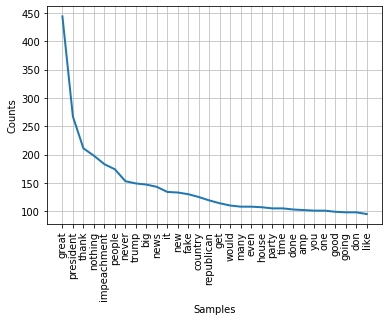

In [9]:
freq = nltk.FreqDist(nopunc_clean_tokens)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(30, cumulative=False)

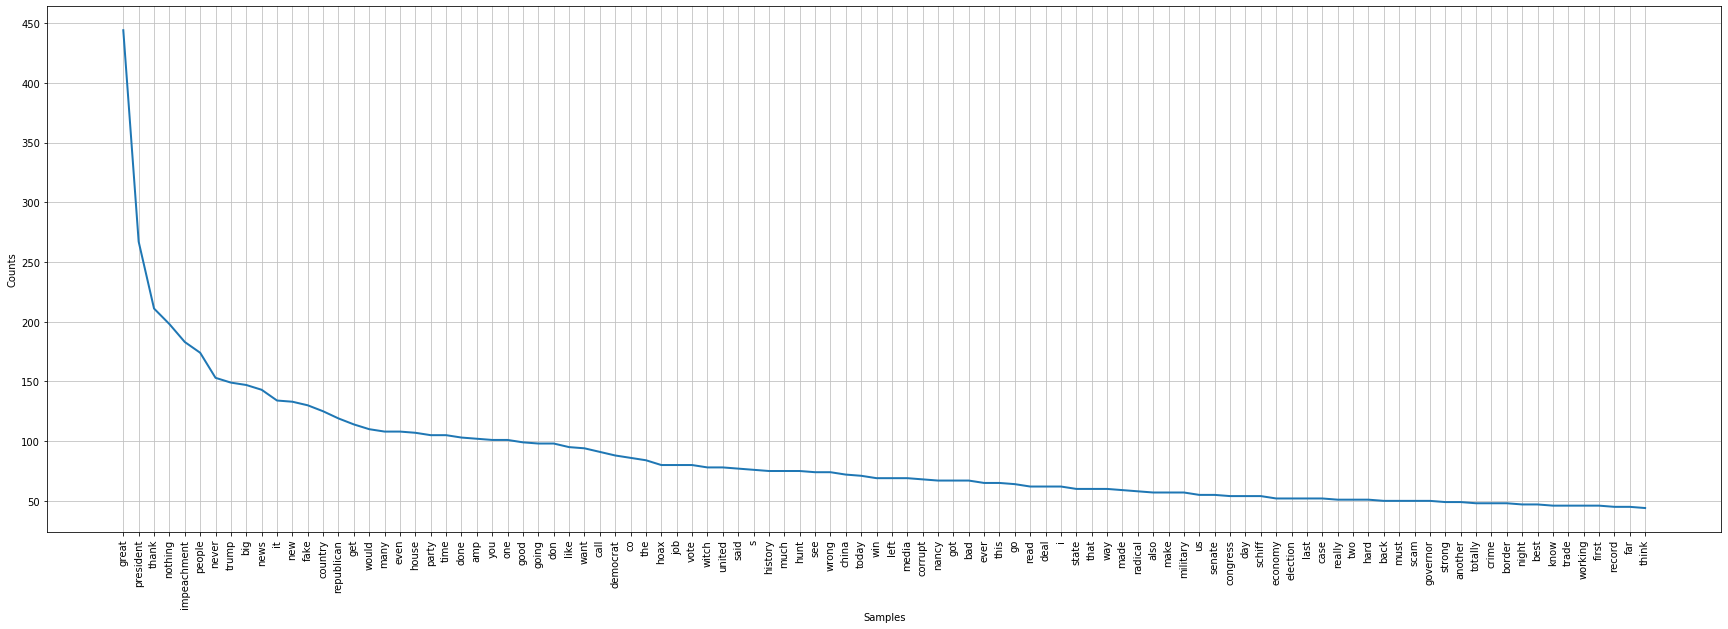

In [10]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

fig = plt.figure(figsize = (30,10))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fdist = FreqDist(nopunc_clean_tokens)
fdist.plot(100, cumulative=False)
plt.show()
fig.savefig('freqDist.png', bbox_inches = "tight")

In [16]:
import csv

csv_dic = {}

for word in nopunc_clean_tokens:
    csv_dic.update({word: nopunc_clean_tokens.count(word)})

with open('trump_words.csv', mode='w', newline='\n') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Word', 'Count'])
    for key,value in csv_dic.items():
        writer.writerow([key, value])
    
csv_file.close()